# **Convolutional Neural Networks (CNNs)**

## **Theory**

<div class="alert alert-success" role="alert">
  Please do not move this file from its current location. I utilize some of the data stored in the data folder. If you do need to relocate it, ensure that you also move the data folder along with it.
</div>

### **Why Bother with CNNs in the First Place?**

The three prominent issues with ANNs that prompted the development of their more advanced sibling CNNs are as follows:

- **Parameter Overload:** ANNs often contain millions or even billions of parameters. These parameters need to be trained, which requires a large amount of data and computational resources. Moreover, parameter overload generally leads to overfitting, where the network performs well on the training data but fails to generalize to unseen data.
- **Isolated Pixel Processing/Ignoring Spatial Structure:** When images are fed into a neural network, they're often flattened into a 1D vector of pixel values. This approach treats each pixel as an independent input, thereby ignoring the spatial arrangement of pixels in an image. This oversight means important spatial relationships like edges, shapes, or objects are overlooked.
- **Complexity of Fully Connected Layers:** The presence of "Fully Connected Layers" dramatically increases the number of parameters in a model, making it inefficient and prone to overfitting, especially with high-resolution images. Essentially, this adds unnecessary complexity to the model, hindering its ability to generalize well.

### **CNN Core Architecture**

A **Convolutional Neural Network (CNN)** is a type of neural network widely recognized for its effectiveness in handling image datasets. CNNs utilize convolution layers to detect abstract features within images, making them robust to shifts, distortions, and rotations while retaining the ability to recognize features much like humans do.

Due to their specialization in image processing, CNNs are extensively applied in tasks such as image classification, object detection, and recognition.

The core components of a CNN include:

- Convolutional Layers
- Depth
- Activation Functions
- Pooling Layers
- Fully-Connected Layers (not as many as you would see in an ANN)

<div style="text-align:center;">
    <img src="https://cdn.sanity.io/images/vr8gru94/production/b6337e9122efe9c56985302d3123951ddd237ee6-840x331.png" alt="picture">
</div>

For a comprehensive understanding, I suggest watching the following [video](https://youtu.be/ZBfpkepdZlw?si=GBU_GUj_uvmkVxZi) or accessing the [textual version](https://www.pinecone.io/learn/series/image-search/cnn/). Alternatively, I've summarized the information covered in those sources below:

#### **Convolution Layers**

**Convolutional layers** are the cornerstone of convolutional neural networks, providing the foundation for the name of this neural network branch. Their primary function is to detect specific local features like edges, shapes, and textures within images. These layers operate through a process called convolution, hence the term "convolutional" in CNN. 

Recall that convolution is simply the element-wise multiplication between the pixel values of an image and the weights of a filter or kernel. The resulting values are then summed, producing a single scalar value known as the *scalar product*.

<div style="text-align:center;">
    <img src="https://cdn.sanity.io/images/vr8gru94/production/9d1dfd24b59ee80ddf605093d78672001f711ec4-3430x953.png" alt="picture" style="width: 900px; height: auto;">
</div>

For instance, when a 3x3 filter is applied to an input image starting from the top-left corner, the resulting value from the element-wise multiplication is computed. This operation is repeated as the filter slides (or "convolves") over the previous layer's matrix from left-to-right and top-to-bottom.

You might be wondering about the values of the filters used. These are learned during the training process of the CNN. Initially, these values are typically randomly initialized and then adjusted through backpropagation during training to optimize the network's performance on a specific task, such as image classification or object detection. In fact, by adjusting the values of the filter, the network learns to detect certain features or patterns within the input data, such as edges, textures, or shapes. 

The concept is akin to how we previously utilized Sobel or Canny filters for detecting edges in images. However, this time, our aim is to "learn" filters capable of detecting objects like cats, trees, or whiskers. It's clear that a single filter won't suffice for detecting a car or a cat. Instead, multiple layers of filters are employed to systematically extract hierarchical features from the input data. This will be further elucidated in the "Depth" segment.

For now, let's introduce some common terminology associated with convolutional layers.

<div style="text-align:center">
  <img src="data/videos/clip-1.gif" alt="Alt Text">
</div>

The result of the illustrated convolution operation is termed a *feature map* or *activation map*, which represents the activations of detected features from the input layer. It's crucial to note that significant information loss may occur during convolution due to the inherent dimensionality reduction that takes place during the process.

This is illustrated below.

<div style="text-align:center">
  <img src="data/videos/clip-2.gif" alt="Alt Text">
</div>

To control compression, parameters such as *filter size* and *stride* are adjusted.

- **filter size**: The size of the filter used.
- **stride**: The number of pixels the filter moves after each calculation. Increasing the stride reduces the number of values outputted by the filter, resulting in a more compressed feature map.

The effect of the stride, while holding the filter size constant, is illustrated below.

<div style="text-align:center">
  <img src="data/videos/clip-3.gif" alt="Alt Text">
</div>

Moreover, the degree of information loss is typically greater at the borders of an image compared to the center. This can pose a problem, particularly in smaller images or in cases where features at the border are significant. To address this issue, *padding* can be utilized, which involves adding zero-value pixels around the image. Padding assists in maintaining image dimensions and helps limit or prevent compression between layers.

Having covered all of that, the result size of the convolution is determined by the formula:

$$\text{{Result size}} = \frac{{W - F + 2P}}{S} + 1$$

where

- $W$: Input size
- $F$: Filter size
- $P$: Padding
- $S$: Stride

On a final note, the last two characteristics of a convolutional layer are the number of input and output channels. The _input channels_ refer to the channel dimension of the input tensor. For example, RGB images have a depth of 3 channels (red, green, blue). The _output channels_ are a bit trickier to understand, but essentially, they specify how many different convolutional filters the layer will learn. Each filter detects different patterns or features in the input, resulting in that many output activation maps or channels.

For example: Let's say we have an input image of size 32x32x3 (32x32 spatial dimensions with 3 color channels - RGB). We want to apply a convolutional layer with 10 filters. Therefore, we'll have 10 sets, and each set contains 3-channel filters.

During the forward convolution:

1. Filter 1 is convolved across the full depth of the input volume (32x32x3), producing one 2D activation map.
2. Filter 2 is convolved, producing another 2D activation map.
3. ...
4. Filter 10 is convolved, producing the 10th 2D activation map.

So, the output volume will have 10 channels, representing the 10 filtered activation maps. The spatial size depends on the filter size, stride, padding, etc.

#### **Depth**

In CNNs, **depth** refers to the number of convolutional layers within the network. The significance of depth in CNNs was highlighted by the authors of AlexNet, who identified it as a crucial component for achieving higher performance.

In the initial layers of the CNN, filters may detect simple features such as edges, corners, or textures. As we move deeper into the network, the filters become more specialized and can detect higher-level features that are composed of combinations of simpler features. For example, after detecting edges and textures, subsequent layers may detect parts of objects like wheels, windows, or headlights. Finally, in the later layers, the network may learn to recognize complete objects like cars based on the combination of features detected by the earlier layers.

This hierarchical approach allows the network to learn complex representations of the input data and ultimately make accurate predictions about the presence of objects like cars in images

#### **Activation Functions**

**Activation functions**, which we've seen previously in artificial neural networks (ANNs), play the same crucial role in Convolutional Neural Networks (CNNs) by introducing non-linearity to the network, thus enabling the representation of more complex patterns. These functions are a common feature in every type of neural network.

In the past, CNNs predominantly used activation functions like sigmoid or tanh in their hidden layers. However, in 2012, the introduction of a new activation function called the Rectified Linear Unit (ReLU) gained popularity, particularly through its implementation in AlexNet, which was the leading CNN model at that time. ReLU has remained a popular choice in CNN architectures to this day.

One of the main advantages of ReLU is its simplicity compared to traditional activation functions like tanh and sigmoid.

<div style="text-align:center;">
    <img src="https://cdn.sanity.io/images/vr8gru94/production/3cecbbc6a32699801b6eafbad6105ab4dd83450d-3255x847.png" alt="picture" style="width: 900px; height: auto;">
</div>

#### **Pooling Layers**

**Pooling layers** play a vital role in CNNs by addressing the issue of sensitivity to small changes in the location of input features. While some level of sensitivity is beneficial, as it helps differentiate between different features like a cat with and without whiskers, it's essential for the model to maintain robustness to slight variations.

CNNs utilize pooling layers to achieve this. Pooling layers serve as a downsampling mechanism, compressing information from one layer into a smaller space in the subsequent layer.

One of the primary effects of pooling is the compression of information across several pixels into a single activation, effectively "smoothing out" variations across groups or patches of pixels. This process helps the network become less sensitive to small spatial changes in the input, ensuring more robust feature detection.

Two common pooling methods used in CNNs are average pooling and max pooling. In average pooling, the activations within a window are averaged, while in max pooling, the maximum activation within the window is selected. Essentially, these pooling operations help reduce the spatial dimensions of the feature maps while retaining important information.

<div style="text-align:center;">
    <img src="https://cdn.sanity.io/images/vr8gru94/production/44b2e2a4965069c93ba88eabcc8694a460f08c05-1320x720.png" alt="picture" style="width: 600px; height: auto;">
</div>

#### **Fully-Connected Layers**

Fully connected layers, also known as dense layers, are common ending components of Convolutional Neural Networks (CNNs). They represent neural networks in their simplest form, where each neuron in one layer is connected to every neuron in the next layer. These connections are achieved through a dot product between the inputs and the layer weights, along with a bias term, followed by an activation function.

Typically, fully connected layers are positioned towards the end of a CNN and play a crucial role in transforming the output of convolutional and pooling layers, which are represented as 3D tensors, into more understandable outputs such as class predictions.

<div style="text-align:center;">
    <img src="https://cdn.sanity.io/images/vr8gru94/production/cdd66a0b07742d1442311f3358845690074337c2-1928x836.png" alt="picture" style="width: 700px; height: auto;">
</div>

In the case of classification problems, fully connected layers often employ a softmax activation function to generate a probability distribution across the output nodes, where each node corresponds to a specific class. This enables the network to provide probability scores for each class, aiding in decision-making and classification.

<div style="text-align:center;">
    <img src="https://cdn.sanity.io/images/vr8gru94/production/ce8c6219c2037987b1db6a5d02266350ed5971ff-2248x972.png" alt="picture" style="width: 700px; height: auto;">
</div>

<div class="alert alert-success" role="alert">
  It's important to note that while these components represent common features of CNNs, there is no one-size-fits-all architecture. Over time, various CNN architectures with different network designs have been developed, each tailored to specific tasks or datasets. These architectures serve as guideposts, providing insights into high-performing network designs rather than strict templates.
</div>

## **Examples**

<div class="alert alert-success" role="alert">
  I encourage you to follow along on Google Colab as we will be utilizing its GPU capabilities.
</div>

### **Example 1: Building a CNN Model for the MNIST Dataset**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

Now that we've observed the outcome of an artificial neural network model on the MNIST dataset, let's analyze the same data using a Convolutional Neural Network (CNN).

The process is complex but not complicated. We will divide it into manageable chunks and elaborate on each segment as we progress. We'll follow the template below, occasionally going on digressions to discuss related material.

- **Load in the Dataset**: In this step, we import the dataset we aim to work with. It includes preprocessing tasks such as normalization, resizing, or splitting into training, validation, and test sets.
  - Loading the Dataset
  - Preprocessing the Data as Needed
  - Displaying the Data
  - Splitting the Data into Training, Validation, and Test Sets
  - Creating Batches of Training and Validation Sets
- **Define the Convolutional Neural Network**: Here, we design the architecture of the Convolutional Neural Network that we'll use to solve the problem. Alternatively, we may very well exploit a pre-trained model and add our own modifications to it.
  - Defining the Network Architecture
  - Defining the Convolutional Neural Network
- **Train the Model**: This phase involves training the CNN model on the training data. The model learns to map input data to their respective labels or predictions by adjusting its parameters (weights, biases, and kernel values). We define a loss function to measure the discrepancy between the predicted output and true labels, and select an optimization algorithm to minimize the loss. The training process iterates over the training data multiple times (epochs), updating the model parameters based on the gradients of the loss function.
  - Defining the Loss Function & Optimizer
  - Training the Model
  - Plotting the Training and Validation Accuracy and Loss over Time
- **Evaluate The Model**: After training, we evaluate the model's performance on a separate test set. This involves making predictions on the test data using the trained model and comparing the predicted outputs with the true labels (ground truth). We use evaluation metrics like accuracy, precision, recall, F1-score, etc., to gauge the model's performance. This step helps us understand the model's ability to generalize to new, unseen data and whether it has learned meaningful patterns from the training data.
  - Evaluating the Model (Computing Performance Metrics)
  - Building a Confusion Matrix
  - Running New Input through the Model

I've also written the code to be as generic as possible. You can use the code as templates, but make sure to modify them as needed for your specific requirements.

#### **Load in the Dataset**

**Loading the Dataset**

There are various methods to download the MNIST dataset. PyTorch provides access to it through the `datasets` module from the `torchvision` library, which offers access to various standard datasets commonly used for computer vision tasks.

Some datasets available in `torchvision.datasets` include:

- **MNIST**: Handwritten digits dataset
- **FashionMNIST**: Fashion products dataset, similar in structure to MNIST
- **CIFAR10** and **CIFAR100**: Tiny images dataset with 10 or 100 classes, respectively

Upon the initial invocation, the dataset will be downloaded to your specified path on your computer. Subsequently, torchvision will always check for a local copy before attempting to download it again.

In [3]:
from torchvision import datasets

In [4]:
# Loading training data (MNIST dataset)
train_data = datasets.MNIST(
    root='./data',  # Directory where the dataset will be stored
    train=True,  # Loading the training set
    download=True  # Download the dataset if not already present
)

# Loading testing data (MNIST dataset)
test_data = datasets.MNIST(
    root='./data',  # Directory where the dataset will be stored
    train=False,  # Loading the testing set
    download=True  # Download the dataset if not already present
)

# Extracting class names and labels
class_names = train_data.classes  # Get the class names (labels) for the dataset
class_labels = [value for key, value in train_data.class_to_idx.items()]  # Get the numerical labels for each class

In [32]:
# Print class names and their corresponding labels
print('Class Name \t\t Class Label\n')

for class_name, class_label in zip(class_names, class_labels):
    # Print class name and label with appropriate formatting
    print(f'{class_name:<15} {class_label:>15}')

# Print total number of classes in dataset
print(f'\nTotal Classes: {len(class_names)}')

Class Name 		 Class Label

0 - zero                      0
1 - one                       1
2 - two                       2
3 - three                     3
4 - four                      4
5 - five                      5
6 - six                       6
7 - seven                     7
8 - eight                     8
9 - nine                      9

Total Classes: 10


`train_data` and `test_data` are both lists of tuples. In each tuple, the first element represents the image, and the second element is an integer denoting the label of the corresponding image. It's important to note that reading the dataset in this manner encodes the images in the PIL format. This format is the standard way of dealing with images in Python and can be considered the default data structure for handling images.

In [149]:
# print(train_data[0])   # returns (Image, int)
# type(train_data[0][0]) # returns Image
# type(train_data[0][1]) # returns int

**Displaying the Data & Preprocessing the Data as Needed**

Let's display the first few images. Note that the `imshow()` function in matplotlib accepts a PIL image as an argument. Therefore, there's no need to convert the image into a numpy array.

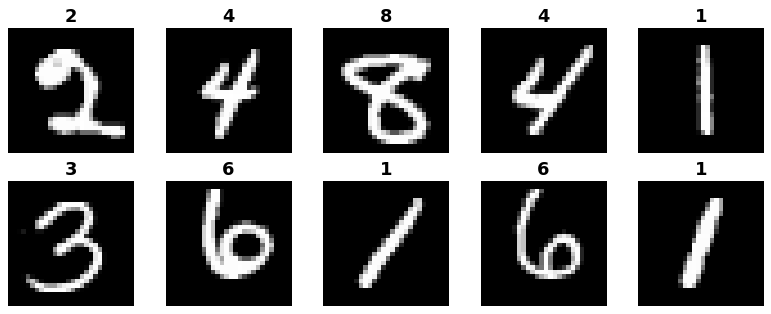

In [41]:
# Create a figure and an array of subplots, arranged in 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

# Flatten the array of subplots into a 1D array for easier indexing
axes = axes.flatten()

# Generate 10 random indices to select random images from the training data
random_indices = np.random.randint(low=0, high=len(train_data), size=10)

# Loop through the first 10 random indices
for i, image_index in enumerate(random_indices):
    # Extract the image and its corresponding label from the training data
    image, label = train_data[image_index]  # train_data is a tuple containing the image (as a PIL Image) and the corresponding label (as an int)

    # Display the image on the current subplot. Note: imshow() function accepts a PIL image as input.
    axes[i].imshow(image, cmap='gray')

    # Set the title of the subplot to the corresponding label
    # axes[i].set_title(class_names[label], fontweight='bold', fontsize=16) # If you want to display the class names
    axes[i].set_title(class_labels[label], fontweight='bold', fontsize=16) # If you want to display the class labels

    # Turn off axis lines and labels for better visualization
    axes[i].axis('off')

# Adjust the layout of subplots to fit nicely within the figure
plt.tight_layout()

# Display the figure containing the subplots
plt.show()

However, PyTorch models typically expect input data in the form of tensors. Therefore, if we want to use the MNIST dataset with a PyTorch model, we'll need to transform the PIL image into tensors.

This transformation is typically achieved using the `transforms` module from `torchvision`. Specifically, the `transforms.ToTensor()` function converts input data into PyTorch tensors. It's important to note that this transformation also normalizes the pixel values in the input image. By default, it scales the pixel values from the range of [0, 255] to the range of [0.0, 1.0].

In [43]:
from torchvision import transforms

In [44]:
# Define the transformation to convert the data to PyTorch tensors
transformations = transforms.ToTensor()  # This will convert PIL images to PyTorch tensors

# Load the MNIST training dataset, applying the defined transformation
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transformations)

# Load the MNIST testing dataset, applying the same transformation
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transformations)

In [45]:
# type(train_data[0][0]) returns torch.Tensor

`train_data` and `test_data` remain lists of tuples. However, the first element in each tuple is now a tensor. We won't be able to pass it directly to `plt`'s `imshow()` method. You might think this is because `plt.imshow()` does not accept a tensor as an argument, but that's not the case. It does accept tensors as arguments. The actual issue lies in the structure of the tensor itself. `plt.imshow()` assumes the input to be an image of dimensions (h, w, c) where w represents the width, h represents the height, and c represents the number of channels. If we take a look at the structure of our tensors, the shape appears as (c, h, w). If we wish to plot, we'll have to rearrange these dimensions.

In [46]:
# train_data[0][0].shape returns (1, 28, 28)

We can adjust the dimensions either by manually setting them using the `view()` function or by rearranging them index-wise using the `permute()` function.

The `view()` function is analogous to numpy's `reshape()` method. It allows us to reshape a tensor into a new shape while keeping the same underlying data.

The `permute()` function, on the other hand, is used to rearrange the dimensions of a tensor according to a specific order. It returns a new tensor with the dimensions permuted in the desired order. For example, if you have a tensor with dimensions (channels, height, width) at indices 0, 1, and 2 respectively, and you want to rearrange it to (height, width, channels), you essentially want the indices to be (1, 2, 0). In this case, you'll pass in the tuple (1, 2, 0) as the argument to the `permute()` function.

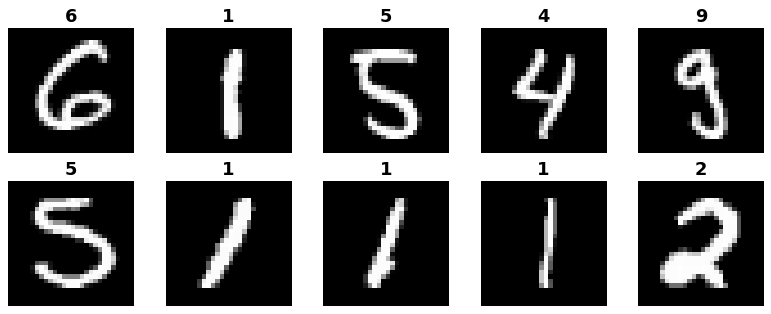

In [48]:
# Create a figure and an array of subplots, arranged in 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

# Flatten the array of subplots into a 1D array for easier indexing
axes = axes.flatten()

# Generate 10 random indices to select random images from the training data
random_indices = np.random.randint(low=0, high=len(train_data), size=10)

# Loop through the first 10 random indices
for i, image_index in enumerate(random_indices):
    # Extract the image and its corresponding label from the training data
    image, label = train_data[image_index]  # train_data is a tuple containing the image (as a Tensor) and the corresponding label (as an int)

    # VERSION 1: Resize the image to (28, 28, 1) shape
    # image = image.view(28, 28, 1)

    # VERSION 2: Transpose the image from (C, H, W) to (H, W, C) format
    image = image.permute(1, 2, 0)

    # Display the image on the current subplot
    axes[i].imshow(image, cmap='gray')

    # Set the title of the subplot to the corresponding class name
    axes[i].set_title(class_labels[label], fontweight='bold', fontsize=16)

    # Turn off axis lines and labels for better visualization
    axes[i].axis('off')

# Adjust the layout of subplots to fit nicely within the figure
plt.tight_layout()

# Display the figure containing the subplots
plt.show()

**Splitting the Data into Training, Validation, and Test Sets**

The need for separate training, validation, and testing datasets arises from the desire to develop a machine learning model that generalizes well to unseen data. The reason why each of these sets is essential is given below:

- **Training Set**: The training set is used to train the model. It consists of a large portion of the available data, and the model learns from this data by adjusting its parameters during the training process. The training set should be representative of the overall distribution of the data and contain diverse examples of the different classes or categories present in the dataset. By exposing the model to a variety of examples during training, it learns to capture underlying patterns and relationships in the data.
- **Validation Set**: The validation set is used to tune hyperparameters and monitor the performance of the model during training. Hyperparameters are parameters that are not learned during the training process but affect the behavior of the model (e.g., learning rate, number of hidden layers, etc.). *By evaluating the model's performance on the validation set after each epoch of training*, we can make adjustments to the hyperparameters to improve the model's performance. This helps prevent overfitting, where the model performs well on the training data but poorly on unseen data.
- **Testing Set**: The testing set is used to evaluate the final performance of the trained model. It consists of data that the model has not seen during training or validation and serves as an independent measure of how well the model generalizes to new, unseen data. By making predictions on the testing set and comparing them to the true labels or ground truth, we can assess the model's accuracy, precision, recall, F1-score, etc. The testing set provides an unbiased estimate of the model's performance and helps us determine whether the model is ready for deployment in real-world scenarios.

If you're still unsure about the difference, here's a great [video](https://www.youtube.com/watch?v=Zi-0rlM4RDs) on the topic.

In PyTorch, the `random_split` function is often used to split a dataset into multiple subsets, such as training, validation, and test sets. This function is particularly useful when you have a dataset and you want to divide it randomly into these subsets while maintaining a certain ratio or size for each.

Here's the general syntax of the `random_split` function from the `torch.utils.data` module:

`torch.utils.data.random_split(dataset, lengths)`

- **dataset**: This is the PyTorch dataset object you want to split.
- **lengths**: This is a list of iterable containing the lengths (or sizes) of each subset you want to generate. The sum of these lengths should be equal to the total length of the dataset.

The function returns a a list of dataset objects, each corresponding to the one of the subsets specified by the lengths provided.

Now that we already have the test set, all we need to do is carve out a portion of the training set and allocate it to the validation set.

In [52]:
from torch.utils.data import random_split

In [53]:
# Calculate the size of the training and validation datasets
train_size = int(0.8 * len(train_data))  # 80% of the total data for training
val_size = int(0.2 * len(train_data))   # 20% of the total data for validation

# Split the training data into training and validation datasets randomly
train_data, val_data = random_split(train_data, [train_size, val_size])

**Creating Batches of Training and Validation Sets**

During training, models are typically trained on large datasets, and processing the entire dataset at once can be memory-intensive and computationally expensive. By dividing the dataset into smaller batches, the model can update its parameters more frequently, and gradient computations can be done in smaller, more manageable chunks. This allows for more efficient training, especially when working with large datasets. That's why it's common to create batches for the training and validation sets.

On the other hand, the purpose of the test set is to evaluate the performance of the trained model on unseen data and assess its generalization capabilities. When evaluating the model on the test set, you typically want to measure its performance on the entire test set at once, rather than in smaller batches. This is because you're interested in the overall performance metrics (such as accuracy, precision, recall, etc.) of the model to assess how well it generalizes to new, unseen data.

The `DataLoader` class is used to shuffle the data into batches. This shuffling process introduces randomness into the training process, which can help prevent the model from memorizing the order of the data.

For example, if the training data is consistently presented in the same order during each training cycle, the model might inadvertently learn to rely on that order when making predictions. This can happen because the model might detect patterns or correlations in the data specific to the order in which the examples are presented, rather than learning general patterns that apply across the entire dataset.

In [54]:
from torch.utils.data import DataLoader

In [55]:
# Define DataLoader for training data
train_loader = DataLoader(
    train_data,  # Training dataset
    batch_size=10,  # Number of samples in each batch
    shuffle=True  # Shuffle the data at each epoch
)

# Define DataLoader for validation data
val_loader = DataLoader(
    val_data,  # Validation dataset
    batch_size=10,  # Number of samples in each batch
    shuffle=True  # Shuffle the data at each epoch
)

# Define DataLoader for testing data
test_loader = DataLoader(
    test_data,  # Testing dataset
    batch_size=len(test_data),  # Use full batch for testing
    shuffle=False  # Do not shuffle the data
)

The output is a `DataLoader` object that can be iterated over to obtain the images and labels for each batch.

In [56]:
# Iterate through the batches in the train_loader
for images, labels in train_loader:
    # Break after processing the first batch for demonstration
    break

# Check the number of images in the batch
# print(len(images))  # Expected value is 10 since we have 10 images per batch

# Check the number of labels in the batch
# print(len(labels))  # Expected value is 10 since we have 10 labels per batch

Instead of using the for loop, you could have used Python's built-in `iter()` function. It is utilized to create an iterator object from an iterable (An iterable is something that you can iterate over, meaning you can go through each element of it one by one). `next()` is another built-in function used to retrieve the next element from an iterator.

In [57]:
iterator = iter(train_loader)

images, labels = next(iterator) # Receives First Batch of Images & Labels
images, labels = next(iterator) # Receives Second Batch of Images & Labels

# Check the number of images in the batch
# print(len(images))  # Expected value is 10 since we have 10 images per batch

# Check the number of labels in the batch
# print(len(labels))  # Expected value is 10 since we have 10 labels per batch

#### **Define the Convolutional Neural Network**

**Defining the Network Architecture**

In the previous section, we used only fully connected layers, with an input layer of 784 (representing our flattened 28x28 images), hidden layers consisting of 100 and 50 neurons, and an output size representing 10 possible digits. This time, we'll employ two convolutional layers. Following each convolutional layer, we'll apply an activation function (ReLU) and then a pooling layer.

After these convolutional and pooling layers, we'll pass the data through three fully connected hidden layers. The model architecture follows this sequence:


1. Convolutional Layer with filter size 3, stride size 1, 1 input channel (grayscale image), and 6 output channels (i.e., 6 filters applied to the input tensor).
2. ReLU Activation Function.
3. Pooling Layer with filter size 2 and stride size 2.
4. Convolutional layer with filter size 3, stride size 1, 6 input channels (corresponding to the 6 output channels from the previous layer), and 16 output channels.
5. ReLU Activation Function.
6. Pooling Layer with filter size 2 and stride size 2.
7. Fully Connected Layer with input size ? and output size 100.
8. ReLU Activation Function.
9. Fully Connected Layer with input size 100 and output size 50.
10. ReLU Activation Function.
11. Fully Connected Layer with input size 50 and output size 10.

---

Before moving on to **Defining the Convolutional Neural Network**, Let's give a brief overview of the function's we'll utilize in this segment:

**How to Create a Convolutional Layer**

The function `torch.nn.Conv2d()` is used to create a 2-dimensional convolutional layer in PyTorch. It applies a 2D convolution over an input signal, typically an image.

`torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride = 1, padding = 0)`

- **in_channels:** Number of input channels (e.g., 3 for RGB images and 1 for grayscale images)
- **out_channels:** Number of output channels (i.e, number of filters)
- **kernel_size:** Size of the convolutional kernel (e.g., 3 for 3x3 kernel)
- **stride:** Stride of the convolution (default is 1)
- **padding:** Zero-padding to both sides of the input (default is 0)

**How to Create a Fully Connected Layer**

The function `torch.nn.Linear()` creates a linear transformation (fully connected) layer in PyTorch.

`torch.nn.Linear(in_features, out_features, bias = True)`

- **in_features:** Size of each input sample
- **out_features:** Size of output sample
- **bias:** Whether to include bias terms (default is True)

**How to Create a Max Pooling Layer**

The function `torch.nn.functional.max_pool2d()` performs 2D max pooling over an input signal. It is used to downsample the input representation, reducing its spatial dimensions while retaining the most important features.

`torch.nn.functional.max_pool2d(input, kernel_size, stride = None, padding = 0)`

- **input:** Input tensor
- **kernel_size:** Size of the max pooling window
- **stride:** Stride of the max pooling operation (default is kernel size)
- **padding:** Zero-padding added to both sides of the input (default is 0)

**How to Create an Activation Function (ReLU)**

The function `torch.nn.functional.relu()` applies a rectified linear unit (ReLU) activation function element-wise to the input tensor. ReLU introduces non-linearity to the network by setting all negative values to zero. It helps the model learn complex patterns and relationships in the data.

`torch.nn.functional.relu(input)`

- **input:** Input tensor

---

Now that we understand the purpose of each function, let's outline the steps we need to take:

**Setting up the Convolutional Layers**

The first layer has one input channel (representing the grayscale color channel). We'll assign 6 output channels for feature extraction, which is an arbitrary choice. We'll set our kernel size to 3, creating a 3x3 filter, and the stride size to 1.

`self.conv1 = nn.Conv2d(1, 6, 3, 1)`

The second layer will take our 6 input channels (corresponding to the 6 output channels from the first layer) and produce 16 output channels (arbitrary choice).

`self.conv2 = nn.Conv2d(6, 16, 3, 1)`

**Setting up the Fully Connected Layers**

The size of the input for the first fully connected layer is determined by the final size of the input data after it passes through the convolutional and pooling layers. Let's recap the structure of our network:

1. Convolutional Layer with filter size 3, stride size 1, 1 input channel (grayscale image), and 6 output channels (i.e., 6 filters applied to the input tensor).
2. ReLU Activation Function.
3. Pooling Layer with filter size 2 and stride size 2.
4. Convolutional layer with filter size 3, stride size 1, 6 input channels (corresponding to the 6 output channels from the previous layer), and 16 output channels.
5. ReLU Activation Function.
6. Pooling Layer with filter size 2 and stride size 2.
7. Fully Connected Layer with input size ? and output size 100.
8. ReLU Activation Function.
9. Fully Connected Layer with input size 100 and output size 50.
10. ReLU Activation Function.
11. Fully Connected Layer with input size 50 and output size 10.

Following the first convolutional layer, the image shape becomes (6, 26, 26).

$$26 = \frac{28 - 3 + 2(0)}{1} + 1$$

The depth of the output is equivalent to the number of filters applied by the convolutional layer. In our case, this is 6. As for the activation function, it does not alter the input shape. The pooling layer will further reduce the feature map to (6, 13, 13) but without affecting the depth.

$$13 = \frac{26 - 2 + 2(0)}{2} + 1$$

Subsequently, after the second convolutional layer, the image shape becomes (16, 11, 11), and again, the activation function maintains the input shape.

$$11 = \frac{13 - 3 + 2(0)}{1} + 1$$

The depth becomes 16 because 16 filters were applied by the second convolutional layer.

After the second pooling layer, the image shape becomes (16, 5, 5).

$$5 = \left\lfloor \frac{11 - 2 + 2 \times 0}{2} + 1\right\rfloor$$


Hence, the input size for the first fully connected layer will be (-1, 16 * 5 * 5).


`self.fc1 = nn.Linear(5*5*16, 100)` <br>
`self.fc2 = nn.Linear(100, 50)` <br>
`self.fc3 = nn.Linear(50, 10)`

**Defining the Forward Pass**

The forward pass is where we define how the data traverses through our network. Up until now, the order in which you define the structure of your model doesn't matter. However, the forward pass is where you specify the sequence of operations.

In the forward pass, we determine how the input data flows through the network, layer by layer, applying transformations such as convolutions, pooling, activations, and fully connected operations. This process ultimately generates predictions or feature representations depending on the task at hand.

Following the network architecture, we'll apply the first convolutional layer, followed by an activation function, and then a pooling layer:

`X = self.conv1(X)`<br>
`X = F.relu(X)`<br>
`X = F.max_pool2d(X, 2, 2)`

Next, we'll pass our data through the second convolutional layer:

`X = self.conv2(X)`<br>
`X = F.relu(X)`<br>
`X = F.max_pool2d(X, 2, 2)`

Finally, before feeding the data into the fully connected layers, we need to flatten it (vectorize it), ensuring it's flattened across the columns, not the rows:

`X = X.view(-1, 5 * 5 * 16)`<br>
`X = self.fc1(X)`<br>
`X = F.relu(X)`<br>
`X = self.fc2(X)`

At this point, we can return either X, the log_softmax version of X, or the softmax version of X. The difference lies in the interpretation and usage of the output:

- **Returning the Original Logits X**:
  - The output X contains raw scores or logits, which are the unnormalized predictions of the model.
  - These raw scores represent the model's confidence in each class, but they are not scaled or normalized.
  - Because these scores are not scaled to any specific range, their sum may not necessarily be equal to 1, and hence they cannot be interpreted as probabilities. They could be positive, negative, or zero.
- **Returning the Softmax Version X**:
  - Softmax converts the logits X into probabilities by squashing them between 0 and 1 and ensuring they sum up to 1.
  - Each element of the softmax output represents the probability of the corresponding class, providing a probability distribution over the classes.
  - Softmax is often used when you need to interpret the model's output as probabilities, such as in multi-class classification tasks.
- **Returning the LogSoftmax Version of X**:
  - LogSoftmax computes the logarithm of the softmax probabilities, enhancing numerical stability and simplifying computations. For example, it's easier to compute the cross-entropy loss when training neural networks by using the log softmax version of X.

In many cases, the primary interest lies in identifying the index of the largest value (e.g., selecting the most probable class). In such use cases, it doesn't matter whether you return X as it is or after passing it through either versions of the softmax activation function, as the values change such that the maximum value will always be the maximum value. For our example, we'll return the LogSoftmax version, since we plan to use the Cross Entropy Loss function down the line.

---

Before proceeding to the code, let's review what the network does in a single iteration. Along the way, we'll also verify our image size at each step.

In [162]:
# Define the first convolutional layer
conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 3, stride = 1)

# Define the second convolutional layer
conv2 = nn.Conv2d(6, 16, 3, 1)

# train_data is a list of tuples where the first element is the image in tensor format and the second element is the label of the image.
x = train_data[0][0] # retrieve the image only

In [163]:
x.shape # expected value is [1, 28, 28] (C, H, W)

torch.Size([1, 28, 28])

In [164]:
# Apply the first convolutional layer to the input image
x = conv1(x)

# Apply the ReLU activation function to the output of the first convolutional layer
x = F.relu(x)

# Check the shape of the output tensor
# Expected value is [6, 26, 26], representing [number of channels, height, width]
x.shape

torch.Size([6, 26, 26])

In [165]:
# Apply max pooling with a kernel size of 2x2 and a stride of 2 to the output of the previous layer
x = F.max_pool2d(x, kernel_size = 2, stride = 2)

# Check the shape of the output tensor after max pooling
# Expected value is [6, 13, 13], representing [number of channels, height, width]
x.shape

torch.Size([6, 13, 13])

In [166]:
# Apply the second convolutional layer to the output of the max pooling operation
x = conv2(x)

# Apply the ReLU activation function to the output of the second convolutional layer
x = F.relu(x)

# Check the shape of the output tensor
# Expected value is [16, 11, 11], representing [number of channels, height, width]
x.shape

torch.Size([16, 11, 11])

In [167]:
# Apply max pooling with a kernel size of 2x2 and a stride of 2x2 to the output of the second convolutional layer
x = F.max_pool2d(x, 2, 2)

# Check the shape of the output tensor after max pooling
# Expected value is [16, 5, 5], representing [number of channels, height, width]
x.shape

torch.Size([16, 5, 5])

Alright, the outputs match our expectations. The only difference when we actually run the model is that we won't be feeding a single image at a time, but rather a batch of images. This is why we made use of the `DataLoader` class above. Everything remains the same except our input tensors will now be of the shape `batch size, channels, height, width`.

You can verify this below:

In [62]:
# Iterate through the train_loader, breaking after the first batch
for (x_train, y_train) in train_loader:
    break

# Check the shape of the input batch x_train
# Expected value is [batch_size, channels, height, width]
# In this case, it's expected to be [10, 1, 28, 28]
x_train.shape

torch.Size([10, 1, 28, 28])

---

**Defining the Convolutional Neural Network**

We can now proceed to defining our neural network model. There are two techniques to do so. The first is called the functional approach, and the latter is called the stateful approach. The functional approach is shown first.

In [169]:
class Model(nn.Module):

    def __init__(self):

        super().__init__()

        # Define the first convolutional layer
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        # Define the second convolutional layer
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        # Define the first fully connected (linear) layer
        self.fc1 = nn.Linear(5*5*16, 100)
        # Define the second fully connected (linear) layer
        self.fc2 = nn.Linear(100, 50)
        # Define the third fully connected (linear) layer
        self.fc3 = nn.Linear(50, 10)

    def forward(self, X):
        # First convolutional layer followed by ReLU activation and max pooling
        X = self.conv1(X)
        X = F.relu(X)
        X = F.max_pool2d(X, 2, 2)

        # Second convolutional layer followed by ReLU activation and max pooling
        X = self.conv2(X)
        X = F.relu(X)
        X = F.max_pool2d(X, 2, 2)

        # Flatten the tensor for the fully connected layers
        X = X.view(-1, 5*5*16)

        # First fully connected layer followed by ReLU activation
        X = self.fc1(X)
        X = F.relu(X)

        # Second fully connected layer followed by ReLU activation
        X = self.fc2(X)
        X = F.relu(X)

        # Third fully connected layer followed by log softmax activation
        X = self.fc3(X)
        X = F.softmax(X, dim=1) # Remember X is a column vector, so we apply the activation function across the columns (index = 1)

        return X

In this approach, you define the neural network as a series of interconnected layers or operations. In the constructor, you only delineate the components of the model without specifying their order. In the `forward()` method, you explicitly define the path the data will take as it traverses through the network architecture. Afterward, every time you call the `forward` method with input data, the network performs the forward pass, applying the defined operations to the input data and producing the output data.

Now, let's take a look at the stateful approach.

In [59]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()

        # Define the network architecture using nn.Sequential
        self.network = nn.Sequential(
            # First convolutional layer
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Second convolutional layer
            nn.Conv2d(6, 16, 3, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            # Flatten the tensor for the fully connected layers
            nn.Flatten(),

            # First fully connected layer
            nn.Linear(5*5*16, 100),
            nn.ReLU(),

            # Second fully connected layer
            nn.Linear(100, 50),
            nn.ReLU(),

            # Output layer with LogSoftmax activation
            nn.Linear(50, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, X):
        # Pass input through the defined network architecture
        return self.network(X)

For this technique, we'll make use of the `nn.Sequential` container, which is a convenient way of sequentially stacking a sequence of layers. It allows you to define a neural network architecture by sequentially adding layers or operations one after another. Each element in the sequence represents a layer or module, and the **input of each is implicitly the output of the previous layer**.

The choice of which one to use is based on personal preference. The professor used the stateful approach in his notebook for CNN. Besides that, the stateful approach does have a more elegant structure than the functional approach. You can use the one you're most comfortable with.

All that's left is to instantiate our model. Recall that instantiation will initialize the filter values to random values. To follow along, let's set the seed.

In [60]:
# Set the random seed for reproducibility
torch.manual_seed(42)

# Initialize an instance of the Model class
model = Model()

# Display the model
print(model)

Model(
  (network): Sequential(
    (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=400, out_features=100, bias=True)
    (8): ReLU()
    (9): Linear(in_features=100, out_features=50, bias=True)
    (10): ReLU()
    (11): Linear(in_features=50, out_features=10, bias=True)
    (12): Softmax(dim=1)
  )
)


---

#### **Train the Model**

**Defining the Loss Function & Optimizer**

In [172]:
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

`CrossEntropyLoss` is a loss function commonly used for classification tasks in neural networks. It measures the performance of a classification model by calculating the cross-entropy loss between the predicted class probabilities and the true class labels.

`Adam` (Adaptive Moment Estimation) is an optimization algorithm used to update the weights of a neural network during the training process. It is an extension of the popular stochastic gradient descent (SGD) algorithm and is designed to adapt the learning rates for each parameter based on the average of recent gradients and their squares. The Adam optimizer is widely used in deep learning because it often converges faster than traditional stochastic gradient descent.

**Training the Model**

We'll make use of the `time` library to keep track of the training time.

In [173]:
import time

In [36]:
# Training loop
num_epochs = 5
training_losses = []  # List to store training losses for plotting
training_accuracies = []  # List to store training accuracies for plotting
validation_losses = []  # List to store validation losses for plotting
validation_accuracies = []  # List to store validation accuracies for plotting

start_time = time.time()

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Training phase
    model.train()  # Set the model to training mode
    for training_batch in train_loader:
        images, labels = training_batch

        # Forward pass
        predicted_labels = model(images)

        # Compute the loss
        loss = Loss(predicted_labels, labels)

        # Update running loss
        running_loss += loss.item()

        # Zero the gradients
        optimizer.zero_grad()

        # Backward pass
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predictions = torch.max(predicted_labels, 1)
        total_predictions += len(labels)
        correct_predictions += (predictions == labels).sum().item()

    # Calculate epoch training loss and accuracy
    epoch_training_loss = running_loss / len(train_loader)
    epoch_training_accuracy = 100 * correct_predictions / total_predictions

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        validation_loss = 0.0
        correct_predictions_val = 0
        total_predictions_val = 0

        for validation_batch in val_loader:
            images, labels = validation_batch

            # Forward pass
            predicted_labels = model(images)

            # Compute the loss
            loss = Loss(predicted_labels, labels)

            # Update validation loss
            validation_loss += loss.item()

            # Calculate accuracy
            _, predictions = torch.max(predicted_labels, 1)
            total_predictions_val += len(labels)
            correct_predictions_val += (predictions == labels).sum().item()

    # Calculate epoch validation loss and accuracy
    epoch_validation_loss = validation_loss / len(val_loader)
    epoch_validation_accuracy = 100 * correct_predictions_val / total_predictions_val

    # Print training and validation loss and accuracy for each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {epoch_training_loss:.4f}, Training Accuracy: {epoch_training_accuracy:.2f}%, Validation Loss: {epoch_validation_loss:.4f}, Validation Accuracy: {epoch_validation_accuracy:.2f}%')

    # Append training and validation losses and accuracies to lists for plotting
    training_losses.append(epoch_training_loss)
    training_accuracies.append(epoch_training_accuracy)
    validation_losses.append(epoch_validation_loss)
    validation_accuracies.append(epoch_validation_accuracy)

end_time = time.time()

print(f"\nTraining Time: {end_time - start_time:.0f} seconds")

Epoch [1/5] - Training Loss: 1.5910, Training Accuracy: 87.55%, Validation Loss: 1.5009, Validation Accuracy: 96.16%
Epoch [2/5] - Training Loss: 1.5007, Training Accuracy: 96.10%, Validation Loss: 1.4956, Validation Accuracy: 96.60%
Epoch [3/5] - Training Loss: 1.4932, Training Accuracy: 96.81%, Validation Loss: 1.4910, Validation Accuracy: 97.00%
Epoch [4/5] - Training Loss: 1.4901, Training Accuracy: 97.07%, Validation Loss: 1.4924, Validation Accuracy: 96.88%
Epoch [5/5] - Training Loss: 1.4869, Training Accuracy: 97.43%, Validation Loss: 1.4843, Validation Accuracy: 97.63%

Training Time: 173 seconds


---

**Explanation of the Code**

Let's take a moment to explain the code.

**`running_loss = 0.0`<br>
`correct_predictions = 0`<br>
`total_predictions = 0`**
- At the beginning of each epoch, we initialize the `running_loss` and the prediction counters to zero. The `running_loss` variable accumulates the losses across the entire epoch, specifically the sum of the losses for all the batches within that epoch. Additionally, for every batch processed, we maintain counts of both correct predictions and total predictions made up to that point. These counts will later be used to compute the accuracy once the epoch concludes.

**`model.train()`**
- This method is used to set the model to training mode, which primarily affects layers like dropout and batch normalization. It ensures that these layers are activated during the forward pass, allowing them to perform their respective operations. Dropout layers randomly deactivate some neurons to prevent overfitting, while batch normalization layers normalize activations to stabilize training. We don't have either in this example, so we don't really need this line.

**`images, labels = training_batch`**

- In this line, `training_batch` is a tuple containing two elements: the first element is a batch of images, and the second element is a batch of corresponding labels. What we're doing is unpacking `training_batch` into `images` and `labels`.

**`predicted_labels = model(images)`**

- Here, `model(images)` represents the forward pass through the neural network. By passing these images through the model, we obtain the predicted labels (`predicted_labels`).

**`loss = Loss(predicted_labels, labels)`**

- After obtaining the predicted labels, the next step is to compute the loss function (`Loss`). The `Loss` function takes two arguments: `predicted_labels` (the predicted output of the model) and `labels` (the ground truth labels). It computes the a scalar value that represents the discrepancy between the predicted labels and the actual labels.

**`running_loss += loss.item()`**

- The `item()` is a method used to retrieve the scalar value of a tensor. In this context, `loss` is a tensor that represents the loss computed for a batch of data. By calling, `loss.item()`, we extract the scalar value of the tensor.
- `running_loss += ...` accumulates the total loss over multiple batches during the training process for a given epoch. It is initialized to zero before the start of the epoch and updated within the epoch as batches are processed.

**`optimizer.zero_grad()`**

- The line of code zeros out the gradients of all parameters in the model. Before performing the backward pass (`loss.backward()`), it's essential to clear out the gradients from the previous iteration. This is because PyTorch accumulates gradients by default (i.e., they are not overwritten), and failing to zero them out would lead to incorrect gradient values during the subsequent backward pass.

**`loss.backward()`**

- This line computes the gradients of the loss with respect to all learnable parameters of the model. This step is crucial for backpropagation, where gradients are propagated backward through the network

**`optimizer.step()`**

- After computing the gradients, this line updates the model parameters using the optimization algorithm specified by the optimizer. The optimizer adjusts the parameters in the direction that minimizes the loss, using the computed gradients. This step is where the actual learning happens, as the model parameters are iteratively updated to improve performance on the training data.

**`_, predictions = torch.max(predicted_labels, 1)`**<br>
**`total_predictions += len(labels)`**<br>
**`correct_predictions += (predicted == labels).sum().item()`**

To understand these three lines of code, I recommend running a single iteration and playing around with each line.

In [64]:
correct_predictions = 0
total_predictions = 0

for training_batch in train_loader:

    images, labels = training_batch

    # Forward pass
    predicted_labels = model(images)

    # Calculate accuracy
    _, predictions = torch.max(predicted_labels, 1)
    total_predictions += len(labels)
    correct_predictions += (predictions == labels).sum().item()

    break

# images and labels are both of size 10. This is because the batch size was specified as 10 when creating train_loader.
# images contains 10 images and labels contains 10 labels
# print(images.shape) # Expected Value is [10, 1, 28, 28] because we have 10 images each of which is a grayscale image (1 channel) of dimensions 28 x 28
# print(labels.shape) # Expected Value is 10
# print(labels)       # View the corresponding labels
# print(predicted_labels) # View the output of the model for all 10 images.
# print(predicted_labels.shape) # Expected Value is [10, 10] because we have 10 labels and each label has a probability distribution for the 10 classes (0 to 9)
# print(predicted_labels.sum(dim = 1)) # Run a sum across the columns for each label. Expected Value is 1 because we have a probability distribution (returned softmax(X))

**`_, predictions = torch.max(predicted_labels, 1)`**

- `torch.max()` returns a tuple containing the maximum value in a tensor along with its index. We don't care about the value only the index because that represents the predicted label. For a batch of vectorized tensors, we want the maximum index across the column for each tensor, hence dim = 1.

**`total_predictions = += len(labels)`**

- `len(labels)` will return the batch size. Multiple ways to do this btw, could have also just done len(images).

**`correct_predictions += (predictions == labels).sum().item()`**

- This line compares the predicted class (`predictions`) with the actual labels (`labels`) for each batch.
- `predictions == labels` returns a Boolean tensor indicating where the predictions match the labels. By summing up the True values and converting the result to a Python scalar with `item()`, we obtain the number of correct predictions in the current batch.

**`epoch_loss = running_loss / len(train_loader)`**

- The epoch loss is calculated by dividing the running_loss (the total loss accumulated over all the batches of the epoch) by the total number of batches. This givesn the average  loss per batch for that epoch.

**`epoch_accuracy = 100 * correct_predictions / total_predictions`**

- The epoch accuracy is calcuated by dividing the total number of predictions by the total number of predictions made. This gives the overall accuracy of the model for the current epoch.
- Multiplying by 100 scales the result to a percentage value.

The validation phase follows a similar process. Rather than elaborating on it further, let's discuss how we can make the wait time during model training more informative.

**How to Keep Track of the Training Progress**

We want to visually track the progress of our model during the training phase. Currently, once we initiate the training process, we have to wait until an epoch is completed to receive any textual output indicating that our model is indeed training. However, this approach is unsatisfactory. This is where we'll leverage the `tqdm` library.

In simple terms, `tqdm` is a Python library that allows us to visualize the progress of our loops. If you're interested in learning more about it, you can visit the [documentation](https://pypi.org/project/tqdm/#ipython-jupyter-integration), or watch this [video](https://youtu.be/G-YNxbFeKFE?si=85odvcTlFJ0AGUnp) to get started quickly.

The default styling for tqdm is very good, but you can always modify it to suit your preferences. Below, I've provided a demonstration.

In [121]:
from tqdm.notebook import tqdm

In [122]:
# Reinitialize an instance of the Model class (Remember, our model is alredy trained because of the above code. We want to start fresh)
model = Model()

# It's generally a good practice to reinitialize the optimizer along with the model when you want to start fresh.
# This ensures that any state information or history accumulated by the optimizer during previous training sessions is discarded.
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [123]:
# Training loop
num_epochs = 5
training_losses = []  # List to store training losses for plotting
training_accuracies = []  # List to store training accuracies for plotting
validation_losses = []  # List to store validation losses for plotting
validation_accuracies = []  # List to store validation accuracies for plotting

start_time = time.time()

for epoch in tqdm(range(num_epochs), desc='Total Progress'):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Training phase
    model.train()  # Set the model to training mode
    for training_batch in tqdm(train_loader, desc='Training', leave=False):
        images, labels = training_batch

        # Forward pass
        predicted_labels = model(images)

        # Compute the loss
        loss = Loss(predicted_labels, labels)

        # Update running loss
        running_loss += loss.item()

        # Zero the gradients
        optimizer.zero_grad()

        # Backward pass
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predictions = torch.max(predicted_labels, 1)
        total_predictions += len(labels)
        correct_predictions += (predictions == labels).sum().item()

    # Calculate epoch training loss and accuracy
    epoch_training_loss = running_loss / len(train_loader)
    epoch_training_accuracy = 100 * correct_predictions / total_predictions

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        validation_loss = 0.0
        correct_predictions_val = 0
        total_predictions_val = 0

        for validation_batch in tqdm(val_loader, desc='Validation', leave=False):
            images, labels = validation_batch

            # Forward pass
            predicted_labels = model(images)

            # Compute the loss
            loss = Loss(predicted_labels, labels)

            # Update validation loss
            validation_loss += loss.item()

            # Calculate accuracy
            _, predictions = torch.max(predicted_labels, 1)
            total_predictions_val += len(labels)
            correct_predictions_val += (predictions == labels).sum().item()

    # Calculate epoch validation loss and accuracy
    epoch_validation_loss = validation_loss / len(val_loader)
    epoch_validation_accuracy = 100 * correct_predictions_val / total_predictions_val

    # Print training and validation loss and accuracy for each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {epoch_training_loss:.4f}, Training Accuracy: {epoch_training_accuracy:.2f}%, Validation Loss: {epoch_validation_loss:.4f}, Validation Accuracy: {epoch_validation_accuracy:.2f}%')

    # Append training and validation losses and accuracies to lists for plotting
    training_losses.append(epoch_training_loss)
    training_accuracies.append(epoch_training_accuracy)
    validation_losses.append(epoch_validation_loss)
    validation_accuracies.append(epoch_validation_accuracy)

end_time = time.time()

print(f"\nTraining Time: {end_time - start_time:.0f} seconds")

Total Progress:   0%|          | 0/5 [00:00<?, ?it/s]

Training:   0%|          | 0/4800 [00:00<?, ?it/s]

Validation:   0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [1/5] - Training Loss: 1.6017, Training Accuracy: 86.26%, Validation Loss: 1.5089, Validation Accuracy: 95.39%


Training:   0%|          | 0/4800 [00:00<?, ?it/s]

Validation:   0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [2/5] - Training Loss: 1.4984, Training Accuracy: 96.32%, Validation Loss: 1.4954, Validation Accuracy: 96.59%


Training:   0%|          | 0/4800 [00:00<?, ?it/s]

Validation:   0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [3/5] - Training Loss: 1.4892, Training Accuracy: 97.21%, Validation Loss: 1.4873, Validation Accuracy: 97.39%


Training:   0%|          | 0/4800 [00:00<?, ?it/s]

Validation:   0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [4/5] - Training Loss: 1.4852, Training Accuracy: 97.61%, Validation Loss: 1.4842, Validation Accuracy: 97.69%


Training:   0%|          | 0/4800 [00:00<?, ?it/s]

Validation:   0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [5/5] - Training Loss: 1.4816, Training Accuracy: 97.95%, Validation Loss: 1.4831, Validation Accuracy: 97.81%

Training Time: 169 seconds


**Plotting the Training and Validation Accuracy and Loss over Time**

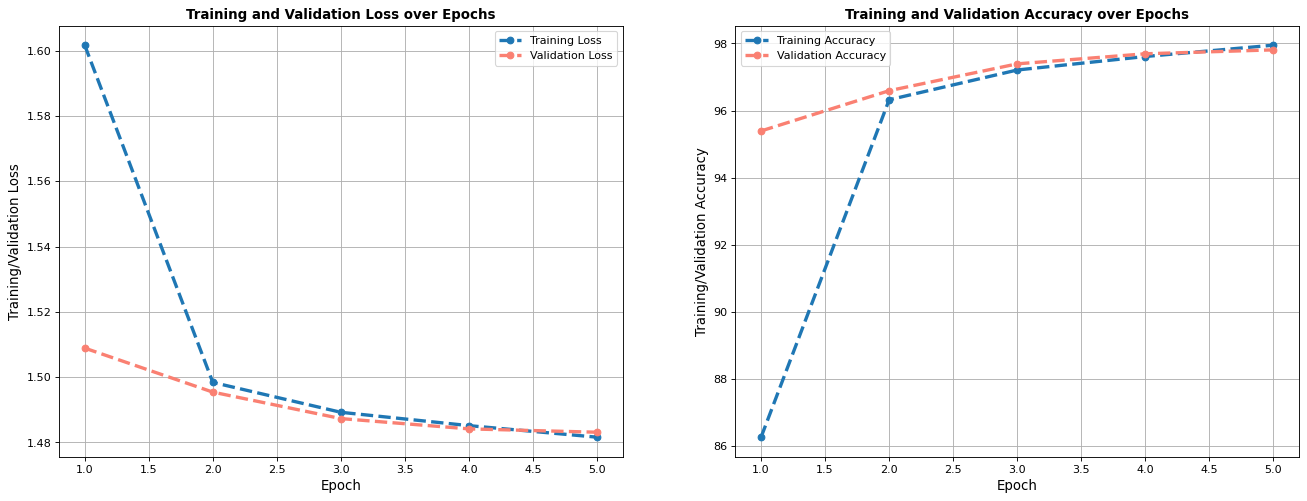

In [124]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Plot training and validation losses on the first subplot
ax1.plot(range(1, num_epochs + 1), training_losses, marker='o', linestyle='--', linewidth=3, label='Training Loss')
ax1.plot(range(1, num_epochs + 1), validation_losses, marker='o', linestyle='--', linewidth=3, color='salmon', label='Validation Loss')
ax1.set_title("Training and Validation Loss over Epochs", fontweight='bold')
ax1.set_xlabel("Epoch", fontsize='12')
ax1.set_ylabel("Training/Validation Loss", fontsize='12')

# Plot training and validation accuracies on the second subplot
ax2.plot(range(1, num_epochs + 1), training_accuracies, marker='o', linestyle='--', linewidth=3, label='Training Accuracy')
ax2.plot(range(1, num_epochs + 1), validation_accuracies, marker='o', linestyle='--', linewidth=3, color='salmon', label='Validation Accuracy')
ax2.set_title("Training and Validation Accuracy over Epochs", fontweight='bold')
ax2.set_xlabel("Epoch", fontsize='12')
ax2.set_ylabel("Training/Validation Accuracy", fontsize='12')

# Display the legend for both subplots
ax1.legend()
ax2.legend()

# Add grids to both subplots
ax1.grid()
ax2.grid()

# Display the plot
plt.show()

Let's briefly discuss the differences between underfitting and overfitting to better interpret the above graphs.

- **Underfitting**
  - Underfitting occurs when a model is too simplistic to capture the underlying patterns in the data, resulting in poor performance not only on the training set but also on the validation data.
  - One indication of underfitting is a high error rate on both the training and validation sets.
  - Solutions to underfitting typically involve increasing the model's complexity, such as adding more layers or neurons, increasing training epochs, or employing more sophisticated algorithms.

- **Overfitting**
  - Overfitting occurs when a model learns the training data too precisely, capturing noise or random fluctuations rather than the underlying patterns. Consequently, it performs exceptionally well on the training set but poorly on unseen data.
  - One indication of overfitting is high accuracy or low error on the training set but significantly lower accuracy or higher error on the validation set.
  - Solutions to overfitting often entail reducing the model's complexity.

From the graphs, our validation accuracies and losses closely track our training accuracies and losses, indicating a well-generalized model.

Before moving on to **Evaluate the Model**, let's explore how we can expedite our training process.

**How to Improve the Speed of Training Time**

This network, which deals with simple input data (grayscale images of 28x28 pixels), took approximately 3 minutes to complete. To increase processing speed, we'll need a GPU.

A GPU, or Graphics Processing Unit, is a specialized electronic circuit initially designed to handle complex calculations required for rendering graphics in video games. Since then, GPUs have evolved to become highly efficient at performing parallel processing tasks, making them well-suited for a wide range of computationally intensive tasks beyond graphics, such as scientific simulations and machine learning.

The reason for this is that GPUs have hundreds to thousands of cores, allowing them to execute many calculations simultaneously. They work in conjunction with a computer's central processing unit (CPU) to offload specific tasks and improve overall system performance, particularly for tasks that benefit from parallel processing.

Since I don't have a local GPU on my machine, I'll be transitioning to Google Colab for this. Google Colab is essentially an alternative to Jupyter Notebook that allows you to run Python code in the cloud rather than on your local machine. Some of the benefits of Google Colab include:

- **Pre-installed libraries**: Colab comes with many popular libraries pre-installed, such as TensorFlow, PyTorch, and Matplotlib, making it convenient for users to start coding without worrying about installing dependencies. You also don't need to go through the hassle of creating your own environment, as is the case with Conda, although some developers might prefer this.

- **Free GPU and TPU support**: Colab provides free access to GPU (Graphics Processing Unit) and TPU (Tensor Processing Unit) resources, which can significantly speed up the execution of deep learning and machine learning tasks.

The first thing to note is that whatever you execute on Google Colab, you'll first have to upload to the cloud. For this reason, the first thing we'll be doing is uploading this file.

To start, let's open up [Google Colab](https://colab.research.google.com/). Then, select "Upload" and click on "Browse" to upload the file of interest. This will create a copy of your file saved onto your Google Drive. Make sure to download the uploaded file back onto your local machine once you're done.

Once you're on Google Colab and you've opened the file, you'll have to select a GPU, as by default, Colab allocates a CPU. To do this, you'll need to select "Runtime", then "Change Runtime Type", and choose T4 GPU. What's important to note is that this resource is allocated based on availability. There may be times where the resource pool can no longer support additional consumers, in which case the option may not appear. In those cases, you'll just have to try again later.

The next step is to rerun all our code blocks preceding the training phase just to get set up.

Before proceeding, here some background information about what's coming up:

- NVIDIA is a leading manufacturer of GPUs.
- CUDA is a technology specifically developed by NVIDIA for their GPUs and is not compatible with GPUs from other manufacturers.
- CUDA enables developers to harness the harness the parallel computing power of NVIDIA GPUs.
- PyTorch comes with built-in support for CUDA, which allow users to seamlessly utilize NVIDIA GPUs for accelerated deep learning computations.
- CUDA provides the underlying technology that enables PyTorch to offload computations to the GPU, significantly speeding up both training and testing for deep learning models.

Now, we'll see how to modify our code to take advantage of Google's GPU.

In [174]:
# Define the device (e.g., GPU or CPU) for tensor operations
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on GPU")
else:
    device = torch.device("cpu")
    print("GPU Not Available. Running on CPU")

GPU Not Available. Running on CPU


This code snippet checks if PyTorch has access to a GPU (Graphics Processing Unit) for computation. If CUDA is available, `torch.cuda.is_available()` returns True. Upon this evaluation, the device variable is assigned to the GPU device cuda:0, and it prints "Running on GPU" to indicate that the program will utilize a GPU for computations.

On the other hand, if CUDA is not available, the method evaluates to false, and the device is assigned to the CPU, which is the default.

It's important to note that not all operations will be performed on the GPU. Instead, by using the `device` variable, we can selectively offload certain procedures to the GPU. The `to()` method in PyTorch is used to transfer data to the specified device.

The first thing we'll send to the GPU is our entire network model. We'll start with a fresh model and send it to the GPU.

In [175]:
# Set the random seed for reproducibility
torch.manual_seed(42)

# Reinitialize an instance of the Model class
model = Model()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

# Move the model to the specified device (GPU or CPU)
model = model.to(device)

Now, let's copy and paste the code for training our model and introduce the new changes.

In [176]:
import time
from tqdm.notebook import tqdm

In [177]:
# Training loop
num_epochs = 5
training_losses = []  # List to store training losses for plotting
training_accuracies = []  # List to store training accuracies for plotting
validation_losses = []  # List to store validation losses for plotting
validation_accuracies = []  # List to store validation accuracies for plotting

start_time = time.time()

for epoch in tqdm(range(num_epochs), desc='Total Progress'):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Training phase
    model.train()  # Set the model to training mode
    for training_batch in tqdm(train_loader, desc='Training', leave=False):
        images, labels = training_batch

        # Move the data to the specified device (GPU or CPU)
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        predicted_labels = model(images)

        # Compute the loss
        loss = Loss(predicted_labels, labels)

        # Update running loss
        running_loss += loss.item()

        # Zero the gradients
        optimizer.zero_grad()

        # Backward pass
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predictions = torch.max(predicted_labels, 1)
        total_predictions += len(labels)
        correct_predictions += (predictions == labels).sum().item()

    # Calculate epoch training loss and accuracy
    epoch_training_loss = running_loss / len(train_loader)
    epoch_training_accuracy = 100 * correct_predictions / total_predictions

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        validation_loss = 0.0
        correct_predictions_val = 0
        total_predictions_val = 0

        for validation_batch in tqdm(val_loader, desc='Validation', leave=False):
            images, labels = validation_batch

            # Move the data to the specified device (GPU or CPU)
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            predicted_labels = model(images)

            # Compute the loss
            loss = Loss(predicted_labels, labels)

            # Update validation loss
            validation_loss += loss.item()

            # Calculate accuracy
            _, predictions = torch.max(predicted_labels, 1)
            total_predictions_val += len(labels)
            correct_predictions_val += (predictions == labels).sum().item()

    # Calculate epoch validation loss and accuracy
    epoch_validation_loss = validation_loss / len(val_loader)
    epoch_validation_accuracy = 100 * correct_predictions_val / total_predictions_val

    # Print training and validation loss and accuracy for each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {epoch_training_loss:.4f}, Training Accuracy: {epoch_training_accuracy:.2f}%, Validation Loss: {epoch_validation_loss:.4f}, Validation Accuracy: {epoch_validation_accuracy:.2f}%')

    # Append training and validation losses and accuracies to lists for plotting
    training_losses.append(epoch_training_loss)
    training_accuracies.append(epoch_training_accuracy)
    validation_losses.append(epoch_validation_loss)
    validation_accuracies.append(epoch_validation_accuracy)

end_time = time.time()

print(f"\nTraining Time: {end_time - start_time:.0f} seconds")

Total Progress:   0%|          | 0/5 [00:00<?, ?it/s]

Training:   0%|          | 0/4800 [00:00<?, ?it/s]

Validation:   0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [1/5] - Training Loss: 1.5604, Training Accuracy: 90.46%, Validation Loss: 1.5064, Validation Accuracy: 95.52%


Training:   0%|          | 0/4800 [00:00<?, ?it/s]

Validation:   0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [2/5] - Training Loss: 1.5018, Training Accuracy: 95.99%, Validation Loss: 1.4901, Validation Accuracy: 97.19%


Training:   0%|          | 0/4800 [00:00<?, ?it/s]

Validation:   0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [3/5] - Training Loss: 1.4944, Training Accuracy: 96.71%, Validation Loss: 1.5008, Validation Accuracy: 96.03%


Training:   0%|          | 0/4800 [00:00<?, ?it/s]

Validation:   0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [4/5] - Training Loss: 1.4896, Training Accuracy: 97.15%, Validation Loss: 1.4877, Validation Accuracy: 97.36%


Training:   0%|          | 0/4800 [00:00<?, ?it/s]

Validation:   0%|          | 0/1200 [00:00<?, ?it/s]

Epoch [5/5] - Training Loss: 1.4865, Training Accuracy: 97.49%, Validation Loss: 1.4937, Validation Accuracy: 96.73%

Training Time: 184 seconds


**`images = images.to(device)`**<br>
**`labels = labels.to(device)`**

- The first line of code moves the variable `images` to the specified computing device, which could be either a GPU or CPU.
- Similarly, the second line of code moves the variable `labels` to the same computing device.

Essentially, we need to explicitly provide whatever data our GPU requires using the `to()` method.

In this case, training the model on the GPU was approximately 1.5 times faster than training it on the CPU.

#### **Evaluate the Model**

**Evaluating the Model (Computing Performance Metrics)**

Let's proceed with computing a few performance metrics for our model. We'll utilize sklearn for this task.

In [178]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [179]:
# Using torch.no_grad() to disable gradient calculation
with torch.no_grad():
    y_true = []  # List to store ground truth labels
    y_pred = []  # List to store predicted labels

    # Iterate through the test_loader
    for testing_batch in test_loader:
        images, labels = testing_batch

        # Move the data to the specified device (GPU or CPU)
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass through the model
        predicted_labels = model(images)

        # Get predicted labels
        _, predictions = torch.max(predicted_labels, 1)

        # Append ground truth labels and predictions to the respective lists
        y_true.extend(labels.tolist())
        y_pred.extend(predictions.tolist())

    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  # You can also use 'micro' or 'weighted' averaging
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    report = classification_report(y_true, y_pred, target_names=class_names)

    # Print the performance metrics
    print("Overall Model Performance:\n")
    print(f'- Accuracy: {accuracy * 100:.2f} %')
    print(f'- Precision: {precision * 100:.2f} %')
    print(f'- Recall: {recall * 100:.2f} %')
    print(f'- F1-score: {f1 * 100:.2f} %')

    print(f'\nIndividual Class Performance:\n\n {report}')

Overall Model Performance:

- Accuracy: 96.97 %
- Precision: 97.07 %
- Recall: 96.91 %
- F1-score: 96.94 %

Individual Class Performance:

               precision    recall  f1-score   support

    0 - zero       0.98      0.99      0.98       980
     1 - one       0.99      0.99      0.99      1135
     2 - two       0.95      0.99      0.97      1032
   3 - three       0.91      1.00      0.95      1010
    4 - four       0.98      0.98      0.98       982
    5 - five       0.97      0.95      0.96       892
     6 - six       0.99      0.96      0.98       958
   7 - seven       0.99      0.94      0.96      1028
   8 - eight       0.99      0.92      0.96       974
    9 - nine       0.96      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



**`labels.tolist()`**<br>

- `labels` is a PyTorch tensor containing the ground truth labels for its current batch of data.
- `tolist()` is a PyTorch tensor method that will convert the tensor into a Python list.

**`y_true.extend(...)`**

- `extend()` is a Python list method that appends all the elements in a given iterable (in this case, the list returned by `labels.tolist()`.
- The reason we don't call the `append()` method directly is because that will append the list itself whereas we want to append the individual items from `labels.tolist()`.

**Building a Confusion Matrix**

We'll utilize pandas and seaborn to make our confusion matrix more visually appealing. We'll also have to import the appropriate function from sklearn.

In [180]:
import pandas as pd
import seaborn as sn

from sklearn.metrics import confusion_matrix

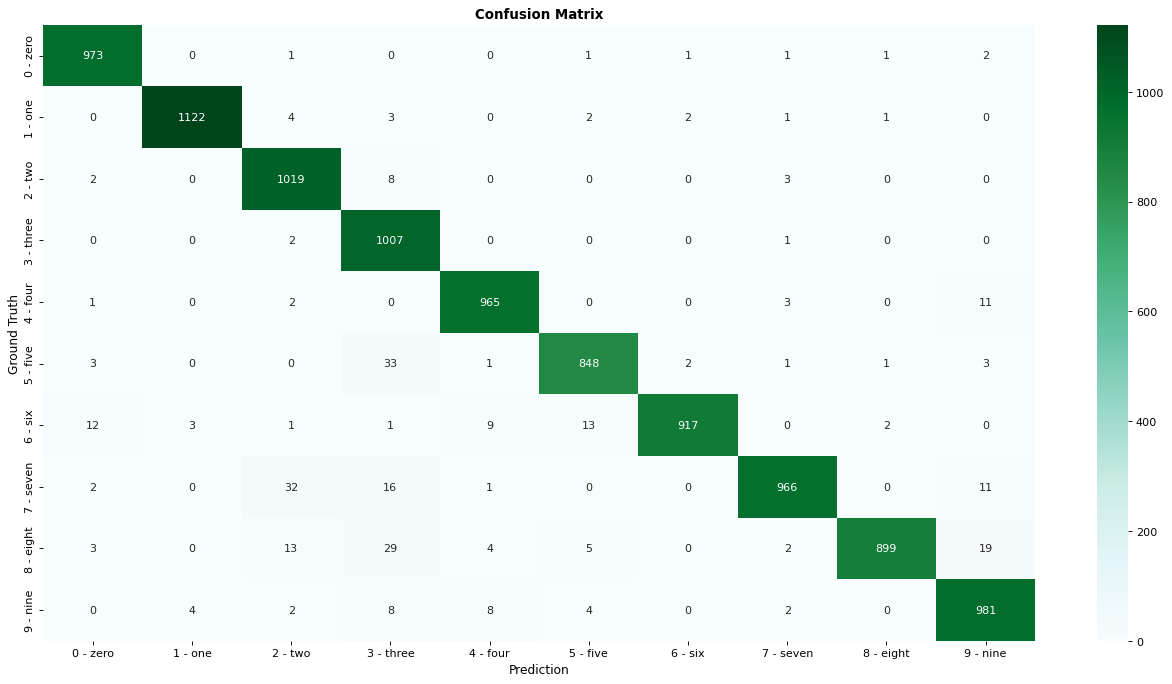

In [192]:
# Compute confusion matrix
arr = confusion_matrix(y_true, y_pred)

# Create a DataFrame from the confusion matrix
df_cm = pd.DataFrame(arr, index=class_names, columns=class_names)

# Create a new figure
plt.figure(figsize=(20, 10))

# Plot the confusion matrix using Seaborn's heatmap
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')

# Set labels and title
plt.xlabel("Prediction", fontsize='11')
plt.ylabel("Ground Truth", fontsize='11')
plt.title("Confusion Matrix", fontweight='bold')

# Show the plot
plt.show()

**`arr = confusion_matrix(y_true, y_pred)`**

- This line computes the confusion matrix using the `confusion_matrix` function.
- The resulting confusion matrix arr is a 2D array where each element `(i, j)` represents the number of instances that belong to class `i` but were predicted as class `j`.

**`class_names = list(range(10))`**<br>
**`df_cm = pd.DataFrame(arr, index=class_names, columns=class_names)`**

- This code segment create a DataFrame `df_cm` from the confusion matrix `arr` with row and column named after the class labels.


**`sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')`**

- This line actually plots our the confusion matrix.
  - `annot=True` adds annotations (actual counts) to each cell of the heatmap
  - `fmt = "d"` formats the annotations as integers.
  - `cmap = 'BuGn'` sets the colormap.

**Running a New Input through the Model**

What if we wanted to obtain predictions from our model on a single image that we provide? Well, it's a bit challenging to obtain a handwritten digit image with dimensions of 28x28. For now, we'll simply use an image from the test set, but later, we'll explore how to input our own image into the trained model.

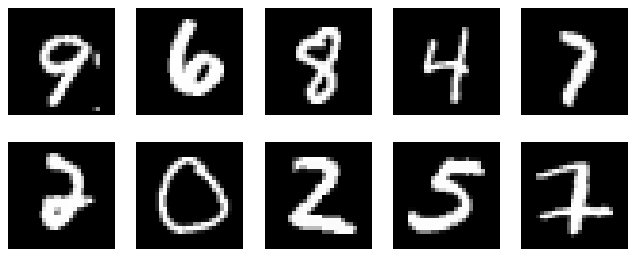

In [201]:
# Define the number of images to display
size = 10

# Generate random indices
random_indices = np.random.randint(low=0, high=len(test_data), size=size)

# Create subplots for displaying images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
axes = axes.flatten()

# Loop through random indices and plot corresponding images
for i, image_index in enumerate(random_indices):
    # Display the image on the current subplot
    axes[i].imshow(test_data[image_index][0].view(28, 28, 1), cmap='gray')
    
    # Turn off axis labels for cleaner visualization
    axes[i].axis('off')

# Display the plot
plt.show()

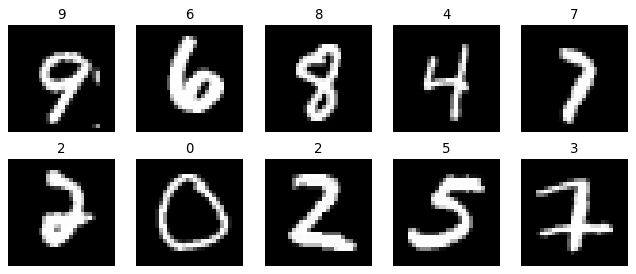

In [202]:
# Stack images from test data based on random indices
image_batch = torch.stack([test_data[image_index][0] for image_index in random_indices])

# Set the model to evaluation mode
model.eval()

# Disable gradient computation during inference
with torch.no_grad():
    # Move image batch to the appropriate device (e.g., GPU)
    image_batch = image_batch.to(device)

    # Get predicted labels from the model
    predicted_labels = model(image_batch)

    # Get the index of the maximum predicted value for each image
    _, predictions = torch.max(predicted_labels, 1)

# Plot the images along with their predicted labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
axes = axes.flatten()

# Loop through random indices and plot corresponding images
for i, image_index in enumerate(random_indices):
    axes[i].imshow(test_data[image_index][0].view(28, 28, 1), cmap='gray')
    axes[i].set_title(class_labels[predictions[i].item()])  # Set title as the predicted label
    axes[i].axis('off')  # Turn off axis labels for cleaner visualization

# Display the plot
plt.show()

### **Example 2: Building a CNN Model for the CIFAR-10 Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import time
from tqdm.notebook import tqdm

For our next example, let's examine the CIFAR-10 dataset. The key distinctions are as follows:

- **Channel Count**: MNIST images are grayscale, whereas CIFAR-10 images consist of three channels (RGB).
- **Image Dimension**: CIFAR images are 32 by 32 pixels, while MNIST images are 28 by 28 pixels.
- **Categories**: The MNIST dataset comprises 10 classes ranging from 0 to 9. In contrast, the CIFAR-10 dataset also includes 10 classes, but they represent various objects:
  - Airplane
  - Automobile
  - Bird
  - Cat
  - Deer
  - Dog
  - Frog
  - Horse
  - Ship
  - Truck

#### **Load in the Dataset**

**Loading the Dataset & Preprocessing the Data as Needed**

This time, we'll proceed by normalizing the values to the range [-1, 1]. Initially, the images will be in PIL format. The `toTensor()` function not only converts the PIL images to tensors but also scales them to the range [0, 1].

To rescale the values, we'll utilize `transforms.Normalize()`. Since we're applying more than one transformation, we'll stack the transformations using `transforms.Compose()`.

Before moving forward, let's discuss some of the benefits of scaling the tensors to the [-1, 1] range:

- **Symmetry around zero**: Normalizing to the range [-1, 1] results in data that is symmetric around zero. This symmetry can be advantageous because it ensures that positive and negative values are treated equally by the neural network. It helps prevent biases from being introduced based on the sign of the values.
- **Zero-centered data**: Normalizing data to have a mean of zero (by using a range symmetric around zero) helps achieve zero-centered data. Zero-centered data simplifies optimization because it makes it easier for the gradients to converge. Without zero-centered data, the gradients might exhibit bias, causing them to oscillate or slow down convergence.

In [65]:
# Define data transformations to be applied
transformations = transforms.Compose([
    transforms.ToTensor(),  # Convert image data to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize image data
])

# Load CIFAR-10 dataset for training
train_data = datasets.CIFAR10(
    root='data',            # Root directory to save the dataset
    train=True,             # Specify training set
    download=True,          # Download the dataset if not already downloaded
    transform=transformations  # Apply specified transformations to the data
)

# Load CIFAR-10 dataset for testing
test_data = datasets.CIFAR10(
    root='data',            # Root directory to save the dataset
    train=False,            # Specify testing set
    download=True,          # Download the dataset if not already downloaded
    transform=transformations  # Apply specified transformations to the data
)

# Extracting class names and labels
class_names = train_data.classes  # Get the class names (labels) for the dataset
class_labels = [value for key, value in train_data.class_to_idx.items()]  # Get the numerical labels for each class

Files already downloaded and verified
Files already downloaded and verified


In [66]:
# Print class names and their corresponding labels
print('Class Name \t\t Class Label\n')

for class_name, class_label in zip(class_names, class_labels):
    # Print class name and label with appropriate formatting
    print(f'{class_name:<15} {class_label:>15}')

# Print total number of classes in dataset
print(f'\nTotal Classes: {len(class_names)}')

Class Name 		 Class Label

airplane                      0
automobile                    1
bird                          2
cat                           3
deer                          4
dog                           5
frog                          6
horse                         7
ship                          8
truck                         9

Total Classes: 10


**`transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))`**

- This normalizes the tensor image with mean and standard deviation. The provided mean and standard deviation values here are (0.5, 0.5, 0.5) for mean and (0.5, 0.5, 0.5) for standard deviation, respectively, for each of the three RGB channels. This means it subtracts 0.5 from each channel and then divides by 0.5, effectively scaling the values to be in the range [-1, 1].

**Displaying the Data**

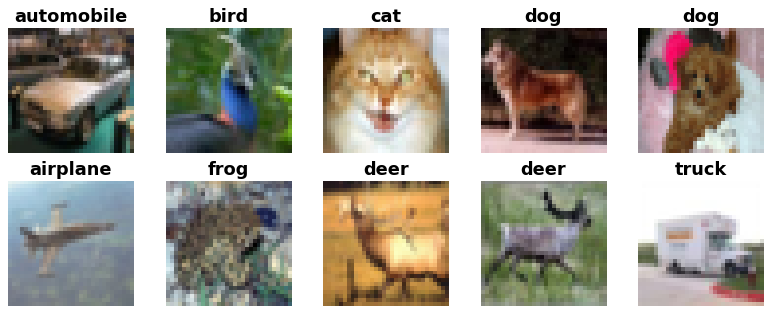

In [67]:
# Reverse the Transformations
transform_back = transforms.Compose([
    transforms.Normalize((-1.,-1.,-1.),(2.,2.,2.)),
    transforms.ToPILImage()
])

# Create a figure and an array of subplots, arranged in 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

# Flatten the array of subplots into a 1D array for easier indexing
axes = axes.flatten()

# Generate 10 random indices to select random images from the training data
random_indices = np.random.randint(low=0, high=len(train_data), size=10)

# Loop through the first 10 random indices
for i, image_index in enumerate(random_indices):
    # Extract the image and its corresponding label from the training data
    image, label = train_data[image_index]  # train_data is a tuple containing the image (as a PIL Image) and the corresponding label (as an int)

    # Display the image on the current subplot. Note: imshow() function accepts a PIL image as input.
    axes[i].imshow(transform_back(image), cmap='gray')

    # Set the title of the subplot to the corresponding label
    axes[i].set_title(class_names[label], fontweight='bold', fontsize=16) # If you want to display the class names
    # axes[i].set_title(class_labels[label], fontweight='bold', fontsize=16) # If you want to display the class labels

    # Turn off axis lines and labels for better visualization
    axes[i].axis('off')

# Adjust the layout of subplots to fit nicely within the figure
plt.tight_layout()

# Display the figure containing the subplots
plt.show()

**Splitting the Data into Training, Validation, and Test Sets**

In [69]:
# Calculate the size of the training and validation datasets
train_size = int(0.8 * len(train_data))  # 80% of the total data for training
val_size = int(0.2 * len(train_data))   # 20% of the total data for validation

# Split the training data into training and validation datasets randomly
train_data, val_data = random_split(train_data, [train_size, val_size])

**Creating Batches of Training and Validation Sets**

In [70]:
# Define DataLoader for training data
train_loader = DataLoader(
    train_data,           # Training dataset
    batch_size=10,        # Number of samples in each batch
    shuffle=True          # Shuffle the data at each epoch
)

# Define DataLoader for validation data
val_loader = DataLoader(
    val_data,            # Validation dataset
    batch_size=10,       # Number of samples in each batch
    shuffle=True         # Shuffle the data at each epoch
)

# Define DataLoader for testing data
test_loader = DataLoader(
    test_data,                  # Testing dataset
    batch_size=len(test_data),  # Use full batch for testing
    shuffle=False               # Do not shuffle the data
)

#### **Define the Convolutional Neural Network**

**Defining the Network Architecture**

The model architecture follows this sequence:

1. Convolutional Layer with filter size 3, padding size 1, 3 input channels (RGB image), and 4 output channels. (4, 32, 32)
2. ReLU Activation Function. (4, 32, 32)
3. Convolutional Layer with filter size 3, padding size 1, 4 input channels, and 8 output channels. (8, 32, 32)
4. ReLU Activation Function. (8, 32, 32)
5. Max Pooling Layer with kernel size 4 and stride size 4. (8, 8, 8)
6. Fully Connected Layer with 512 (8 * 8 * 8) input channels and 128 output channels
7. Fully Connected Layer with 128 input channels and 10 output channels

**Defining the Convolutional Neural Network**

In [209]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()

        # Define the network architecture using nn.Sequential
        self.network = nn.Sequential(
            # First convolutional layer
            nn.Conv2d(in_channels=3, out_channels=4, kernel_size=3, padding=1),
            nn.ReLU(),

            # Second convolutional layer
            nn.Conv2d(4, 8, 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(4, 4),

            # Flatten the tensor for the fully connected layers
            nn.Flatten(),

            # First fully connected layer
            nn.Linear(8 * 8 * 8, 128),
            nn.ReLU(),

            # Second fully connected layer
            nn.Linear(128, 10),

            nn.Softmax(dim=1)
        )

    def forward(self, X):
        # Pass input through the defined network architecture
        return self.network(X)

In [210]:
# Set the random seed for reproducibility
torch.manual_seed(42)

# Initialize an instance of the Model class
model = Model()

# Display the model
print(model)

Model(
  (network): Sequential(
    (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=512, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=10, bias=True)
    (9): Softmax(dim=1)
  )
)


#### **Train the Model**

**Defining the Loss Function & Optimizer**

In [71]:
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

**Training the Model**

In [72]:
# Define the device (e.g., GPU or CPU) for tensor operations
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on GPU")
else:
    device = torch.device("cpu")
    print("GPU Not Available. Running on CPU")

# Move the model to the specified device (GPU or CPU)
model = model.to(device)

GPU Not Available. Running on CPU


In [213]:
# Training loop
num_epochs = 10
training_losses = []  # List to store training losses for plotting
training_accuracies = []  # List to store training accuracies for plotting
validation_losses = []  # List to store validation losses for plotting
validation_accuracies = []  # List to store validation accuracies for plotting

start_time = time.time()

for epoch in tqdm(range(num_epochs), desc='Total Progress'):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Training phase
    model.train()  # Set the model to training mode
    for training_batch in tqdm(train_loader, desc='Training', leave=False):
        images, labels = training_batch

        # Move the data to the specified device (GPU or CPU)
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        predicted_labels = model(images)

        # Compute the loss
        loss = Loss(predicted_labels, labels)

        # Update running loss
        running_loss += loss.item()

        # Zero the gradients
        optimizer.zero_grad()

        # Backward pass
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predictions = torch.max(predicted_labels, 1)
        total_predictions += len(labels)
        correct_predictions += (predictions == labels).sum().item()

    # Calculate epoch training loss and accuracy
    epoch_training_loss = running_loss / len(train_loader)
    epoch_training_accuracy = 100 * correct_predictions / total_predictions

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        validation_loss = 0.0
        correct_predictions_val = 0
        total_predictions_val = 0

        for validation_batch in tqdm(val_loader, desc='Validation', leave=False):
            images, labels = validation_batch

            # Move the data to the specified device (GPU or CPU)
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            predicted_labels = model(images)

            # Compute the loss
            loss = Loss(predicted_labels, labels)

            # Update validation loss
            validation_loss += loss.item()

            # Calculate accuracy
            _, predictions = torch.max(predicted_labels, 1)
            total_predictions_val += len(labels)
            correct_predictions_val += (predictions == labels).sum().item()

    # Calculate epoch validation loss and accuracy
    epoch_validation_loss = validation_loss / len(val_loader)
    epoch_validation_accuracy = 100 * correct_predictions_val / total_predictions_val

    # Print training and validation loss and accuracy for each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {epoch_training_loss:.4f}, Training Accuracy: {epoch_training_accuracy:.2f}%, Validation Loss: {epoch_validation_loss:.4f}, Validation Accuracy: {epoch_validation_accuracy:.2f}%')

    # Append training and validation losses and accuracies to lists for plotting
    training_losses.append(epoch_training_loss)
    training_accuracies.append(epoch_training_accuracy)
    validation_losses.append(epoch_validation_loss)
    validation_accuracies.append(epoch_validation_accuracy)

end_time = time.time()

print(f"\nTraining Time: {end_time - start_time:.0f} seconds")

Total Progress:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/4000 [00:00<?, ?it/s]

Validation:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [1/10] - Training Loss: 2.1080, Training Accuracy: 34.66%, Validation Loss: 2.0342, Validation Accuracy: 42.25%


Training:   0%|          | 0/4000 [00:00<?, ?it/s]

Validation:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [2/10] - Training Loss: 2.0032, Training Accuracy: 45.50%, Validation Loss: 1.9892, Validation Accuracy: 46.70%


Training:   0%|          | 0/4000 [00:00<?, ?it/s]

Validation:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [3/10] - Training Loss: 1.9640, Training Accuracy: 49.54%, Validation Loss: 1.9704, Validation Accuracy: 48.75%


Training:   0%|          | 0/4000 [00:00<?, ?it/s]

Validation:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [4/10] - Training Loss: 1.9421, Training Accuracy: 51.75%, Validation Loss: 1.9568, Validation Accuracy: 50.34%


Training:   0%|          | 0/4000 [00:00<?, ?it/s]

Validation:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [5/10] - Training Loss: 1.9226, Training Accuracy: 53.59%, Validation Loss: 1.9779, Validation Accuracy: 47.90%


Training:   0%|          | 0/4000 [00:00<?, ?it/s]

Validation:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [6/10] - Training Loss: 1.9109, Training Accuracy: 54.83%, Validation Loss: 1.9295, Validation Accuracy: 52.61%


Training:   0%|          | 0/4000 [00:00<?, ?it/s]

Validation:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [7/10] - Training Loss: 1.8959, Training Accuracy: 56.33%, Validation Loss: 1.9350, Validation Accuracy: 52.32%


Training:   0%|          | 0/4000 [00:00<?, ?it/s]

Validation:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [8/10] - Training Loss: 1.8868, Training Accuracy: 57.25%, Validation Loss: 1.9262, Validation Accuracy: 53.24%


Training:   0%|          | 0/4000 [00:00<?, ?it/s]

Validation:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [9/10] - Training Loss: 1.8606, Training Accuracy: 59.98%, Validation Loss: 1.8771, Validation Accuracy: 58.10%


Training:   0%|          | 0/4000 [00:00<?, ?it/s]

Validation:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [10/10] - Training Loss: 1.8290, Training Accuracy: 63.07%, Validation Loss: 1.8780, Validation Accuracy: 58.15%

Training Time: 373 seconds


**Plotting the Training and Validation Accuracy and Loss over Time**

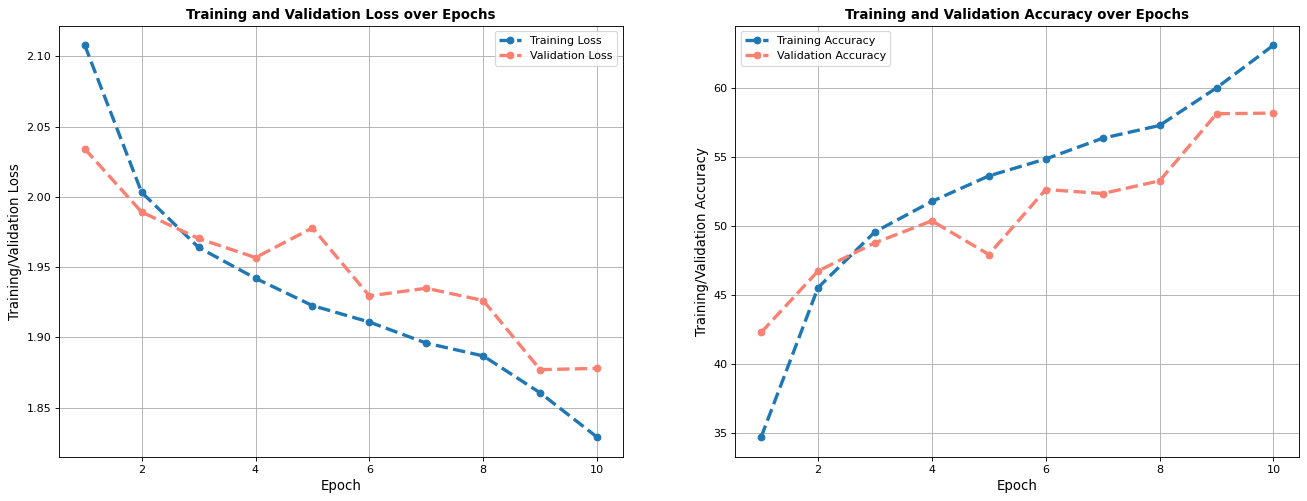

In [218]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Plot training and validation losses on the first subplot
ax1.plot(range(1, num_epochs + 1), training_losses, marker='o', linestyle='--', linewidth=3, label='Training Loss')
ax1.plot(range(1, num_epochs + 1), validation_losses, marker='o', linestyle='--', linewidth=3, color='salmon', label='Validation Loss')
ax1.set_title("Training and Validation Loss over Epochs", fontweight='bold')
ax1.set_xlabel("Epoch", fontsize='12')
ax1.set_ylabel("Training/Validation Loss", fontsize='12')

# Plot training and validation accuracies on the second subplot
ax2.plot(range(1, num_epochs + 1), training_accuracies, marker='o', linestyle='--', linewidth=3, label='Training Accuracy')
ax2.plot(range(1, num_epochs + 1), validation_accuracies, marker='o', linestyle='--', linewidth=3, color='salmon', label='Validation Accuracy')
ax2.set_title("Training and Validation Accuracy over Epochs", fontweight='bold')
ax2.set_xlabel("Epoch", fontsize='12')
ax2.set_ylabel("Training/Validation Accuracy", fontsize='12')

# Display the legend for both subplots
ax1.legend()
ax2.legend()

# Add grids to both subplots
ax1.grid()
ax2.grid()

# Display the plot
plt.show()

#### **Evaluate The Model**

**Evaluating the Model (Computing Performance Metrics)**

In [219]:
# Using torch.no_grad() to disable gradient calculation
with torch.no_grad():
    y_true = []  # List to store ground truth labels
    y_pred = []  # List to store predicted labels

    # Iterate through the test_loader
    for testing_batch in test_loader:
        images, labels = testing_batch

        # Move the data to the specified device (GPU or CPU)
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass through the model
        predicted_labels = model(images)

        # Get predicted labels
        _, predictions = torch.max(predicted_labels, 1)

        # Append ground truth labels and predictions to the respective lists
        y_true.extend(labels.tolist())
        y_pred.extend(predictions.tolist())

    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  # You can also use 'micro' or 'weighted' averaging
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    report = classification_report(y_true, y_pred, target_names=class_names)

    # Print the performance metrics
    print("Overall Model Performance:\n")
    print(f'- Accuracy: {accuracy * 100:.2f} %')
    print(f'- Precision: {precision * 100:.2f} %')
    print(f'- Recall: {recall * 100:.2f} %')
    print(f'- F1-score: {f1 * 100:.2f} %')

    print(f'\nIndividual Class Performance:\n\n {report}')

Overall Model Performance:

- Accuracy: 57.79 %
- Precision: 58.29 %
- Recall: 57.79 %
- F1-score: 57.25 %

Individual Class Performance:

               precision    recall  f1-score   support

    airplane       0.63      0.65      0.64      1000
  automobile       0.68      0.68      0.68      1000
        bird       0.50      0.41      0.45      1000
         cat       0.48      0.33      0.39      1000
        deer       0.54      0.46      0.50      1000
         dog       0.59      0.43      0.50      1000
        frog       0.70      0.66      0.68      1000
       horse       0.52      0.72      0.61      1000
        ship       0.73      0.71      0.72      1000
       truck       0.46      0.72      0.57      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.57     10000
weighted avg       0.58      0.58      0.57     10000



**Building a Confusion Matrix**

In [73]:
# Compute confusion matrix
arr = confusion_matrix(y_true, y_pred)

# Create a DataFrame from the confusion matrix
class_names = class_names
df_cm = pd.DataFrame(arr, index=class_names, columns=class_names)

# Create a new figure
plt.figure(figsize=(9, 6))

# Plot the confusion matrix using Seaborn's heatmap
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')

# Set labels and title
plt.xlabel("Prediction", fontsize='11')
plt.ylabel("Ground Truth", fontsize='11')
plt.title("Confusion Matrix", fontweight='bold')

# Show the plot
plt.show()

NameError: name 'confusion_matrix' is not defined

**Running a New Input through the Model**

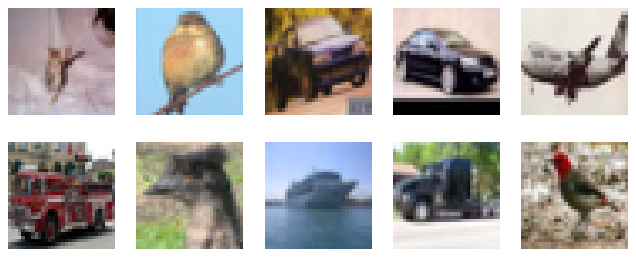

In [74]:
# Define the number of images to display
size = 10

# Generate random indices
random_indices = np.random.randint(low=0, high=len(test_data), size=size)

# Create subplots for displaying images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
axes = axes.flatten()

# Loop through random indices and plot corresponding images
for i, image_index in enumerate(random_indices):
    # Display the image on the current subplot
    axes[i].imshow(transform_back(test_data[image_index][0]), cmap='gray')
    
    # Turn off axis labels for cleaner visualization
    axes[i].axis('off')

# Display the plot
plt.show()

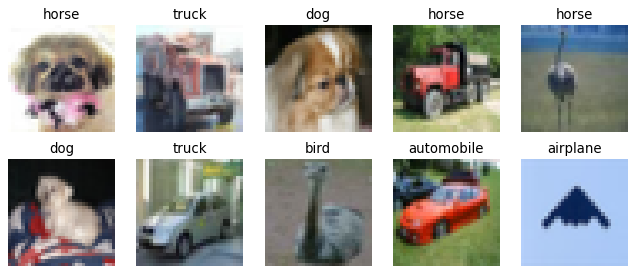

In [225]:
# Stack images from test data based on random indices
image_batch = torch.stack([test_data[image_index][0] for image_index in random_indices])

# Set the model to evaluation mode
model.eval()

# Disable gradient computation during inference
with torch.no_grad():
    # Move image batch to the appropriate device (e.g., GPU)
    image_batch = image_batch.to(device)

    # Get predicted labels from the model
    predicted_labels = model(image_batch)

    # Get the index of the maximum predicted value for each image
    _, predictions = torch.max(predicted_labels, 1)

# Plot the images along with their predicted labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
axes = axes.flatten()

# Loop through random indices and plot corresponding images
for i, image_index in enumerate(random_indices):
    axes[i].imshow(transform_back(test_data[image_index][0]), cmap='gray')
    axes[i].set_title(class_names[predictions[i].item()])  # Set title as the predicted label
    axes[i].axis('off')  # Turn off axis labels for cleaner visualization

# Display the plot
plt.show()

Refer to Homework 3, Question 3.

Refer to Homework 3, Questions 1 & 2.